<a href="https://colab.research.google.com/github/LW1117/FreeCodeCampusProjects/blob/main/MachineLearning/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

##Dataset
###MAGIC Gamma Telescope
Donated on 4/30/2007
Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope

###Dataset url :
https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).

http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68




In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class" ]
df = pd.read_csv("magic04.data", names=cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df["class"] = (df["class"] == "g").astype(int)

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
  plt.hist(df[df["class"] == 0][label], color='red', label='hydron', alpha=0.7, density=True)
  plt.ylabel("Probablity")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, validation and test datasets


In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

#kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1333
           1       0.85      0.86      0.86      2471

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [ ]:
y_test

array([0, 1, 0, ..., 1, 1, 1])

#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.39      0.49      1333
           1       0.73      0.89      0.80      2471

    accuracy                           0.72      3804
   macro avg       0.69      0.64      0.65      3804
weighted avg       0.70      0.72      0.69      3804



#Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      1333
           1       0.84      0.82      0.83      2471

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1333
           1       0.88      0.90      0.89      2471

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax1.grid(True)

  plt.show()

In [ ]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy', metrics=['accuracy'])
  history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )
  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


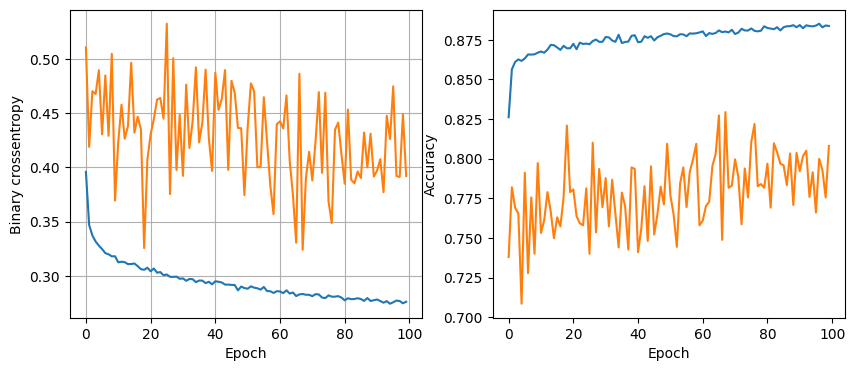

119/119 [==============================] - 0s 3ms/step - loss: 0.3356 - accuracy: 0.8717
16 nodes, dropout 0, lr 0.01, batch size 64


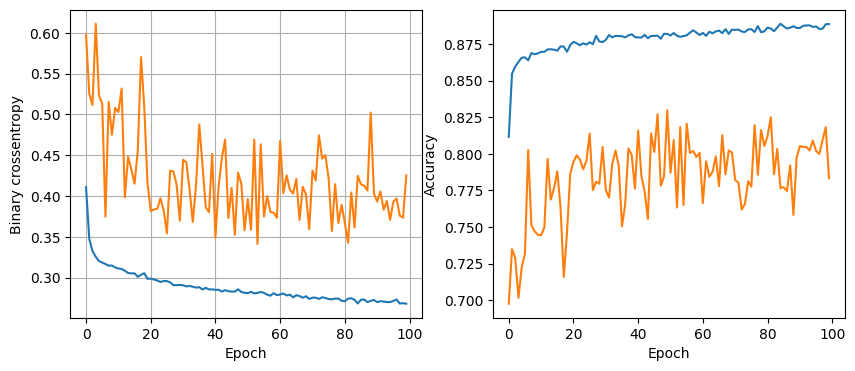

119/119 [==============================] - 0s 2ms/step - loss: 0.3386 - accuracy: 0.8759
16 nodes, dropout 0, lr 0.01, batch size 128


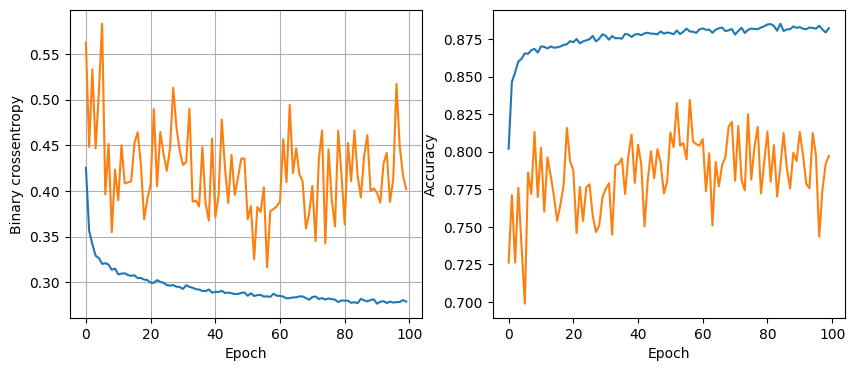

119/119 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.8665
16 nodes, dropout 0, lr 0.005, batch size 32


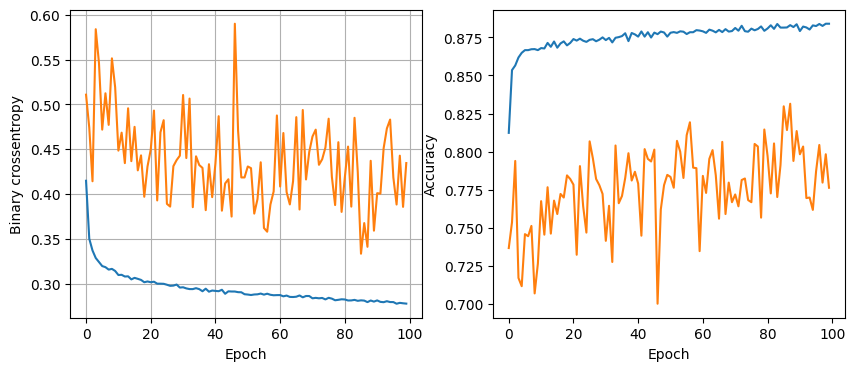

119/119 [==============================] - 0s 2ms/step - loss: 0.3271 - accuracy: 0.8691
16 nodes, dropout 0, lr 0.005, batch size 64


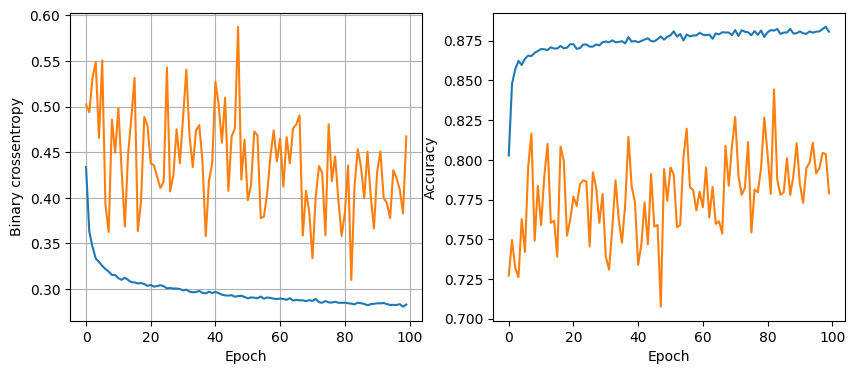

119/119 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8715
16 nodes, dropout 0, lr 0.005, batch size 128


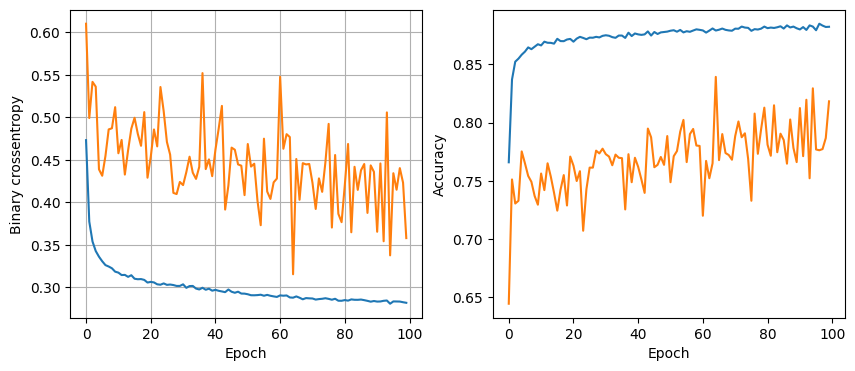

119/119 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.001, batch size 32


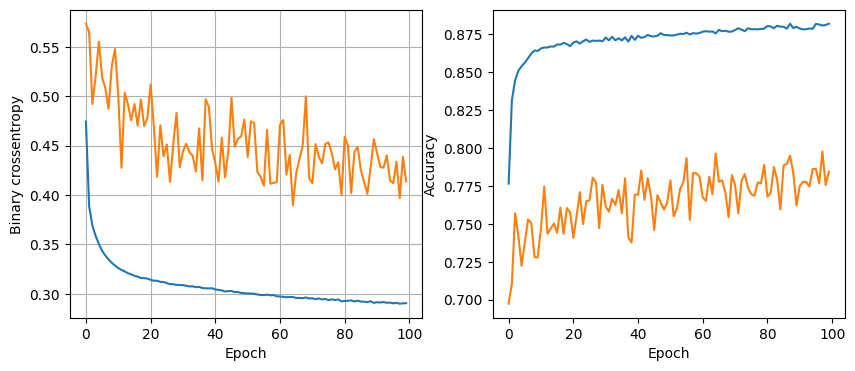

119/119 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.001, batch size 64


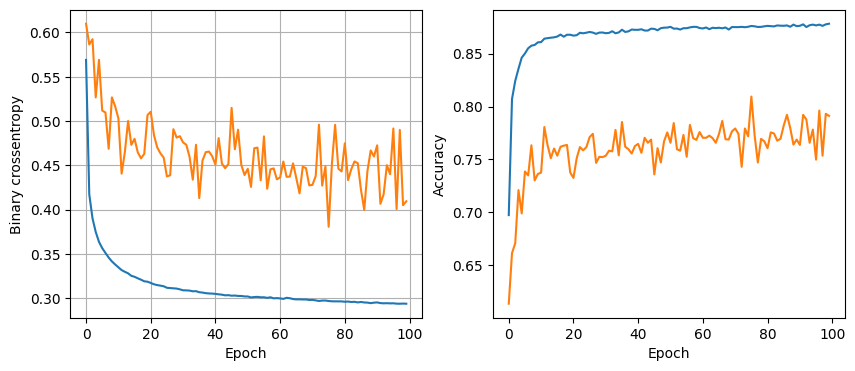

119/119 [==============================] - 0s 2ms/step - loss: 0.3270 - accuracy: 0.8665
16 nodes, dropout 0, lr 0.001, batch size 128


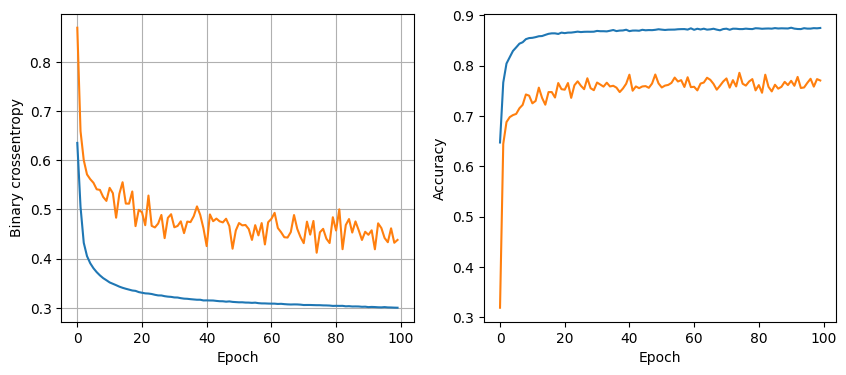

119/119 [==============================] - 0s 2ms/step - loss: 0.3294 - accuracy: 0.8599
16 nodes, dropout 0.2, lr 0.01, batch size 32


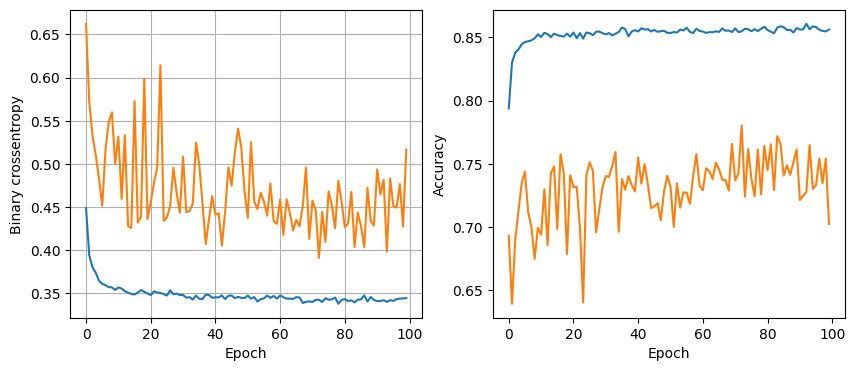

119/119 [==============================] - 0s 2ms/step - loss: 0.3275 - accuracy: 0.8580
16 nodes, dropout 0.2, lr 0.01, batch size 64


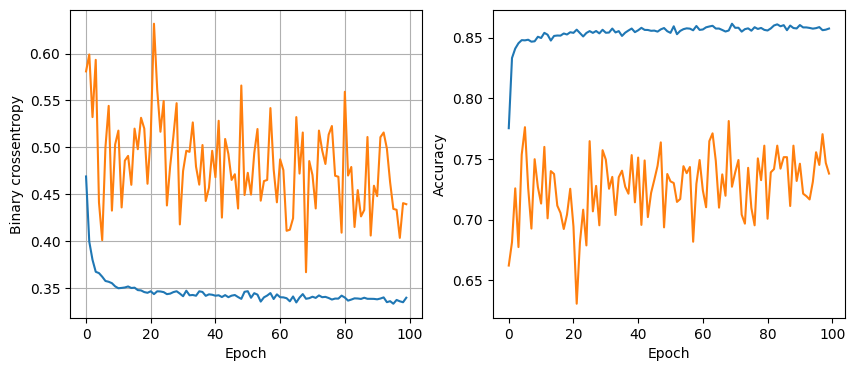

119/119 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8649
16 nodes, dropout 0.2, lr 0.01, batch size 128


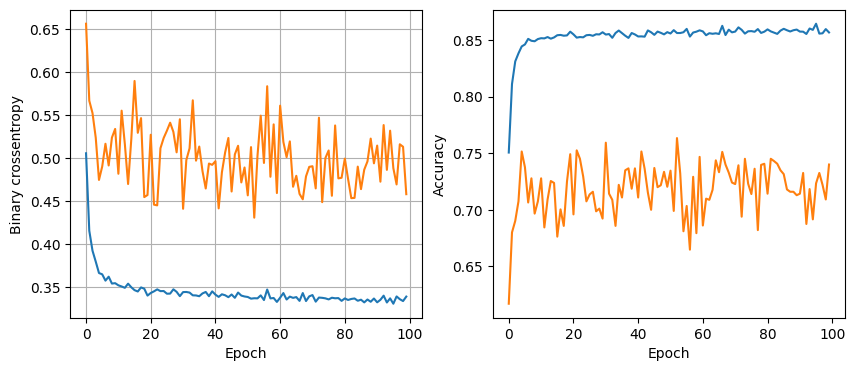

119/119 [==============================] - 0s 2ms/step - loss: 0.3220 - accuracy: 0.8675
16 nodes, dropout 0.2, lr 0.005, batch size 32


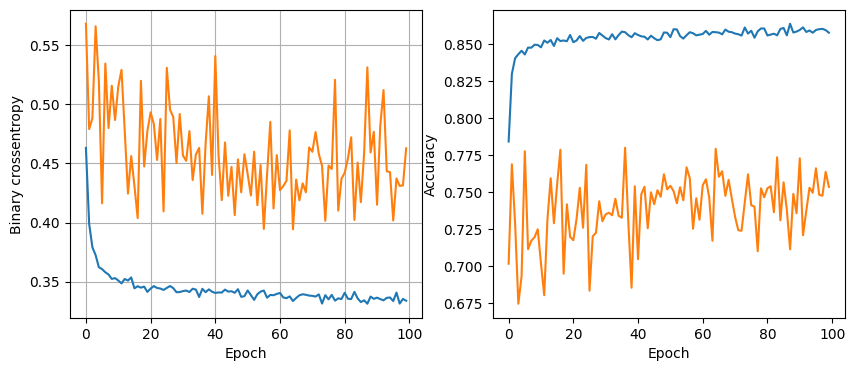

119/119 [==============================] - 0s 3ms/step - loss: 0.3259 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.005, batch size 64


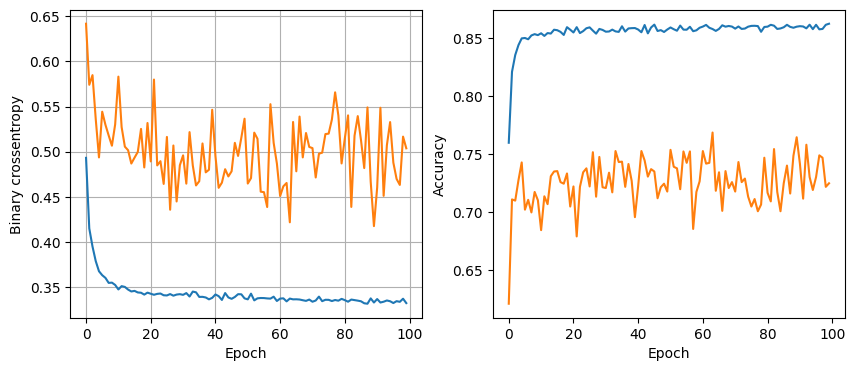

119/119 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8665
16 nodes, dropout 0.2, lr 0.005, batch size 128


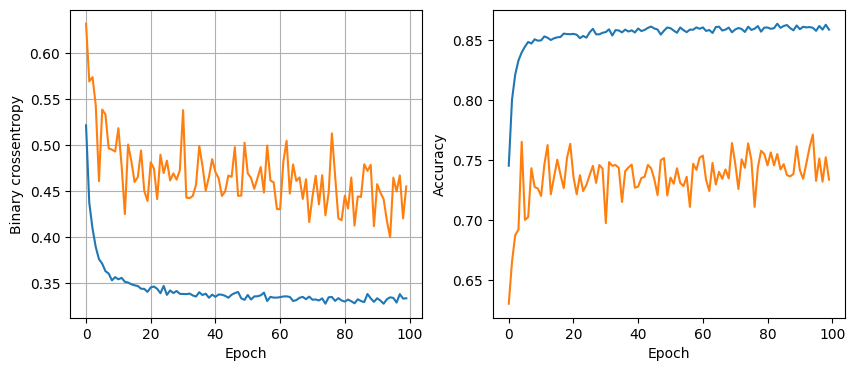

119/119 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.8628
16 nodes, dropout 0.2, lr 0.001, batch size 32


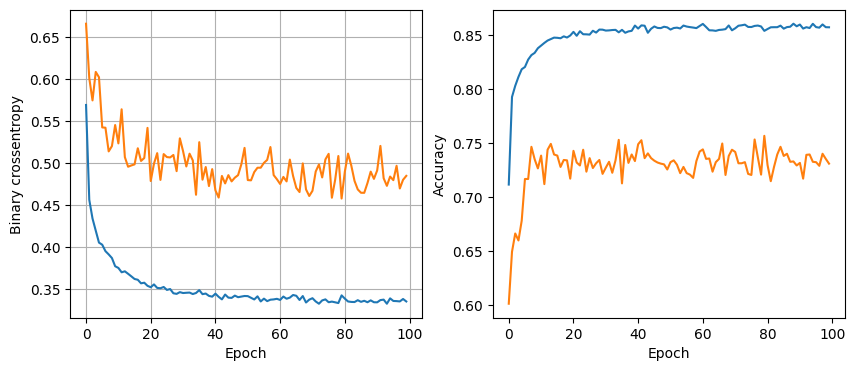

119/119 [==============================] - 0s 3ms/step - loss: 0.3279 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.001, batch size 64


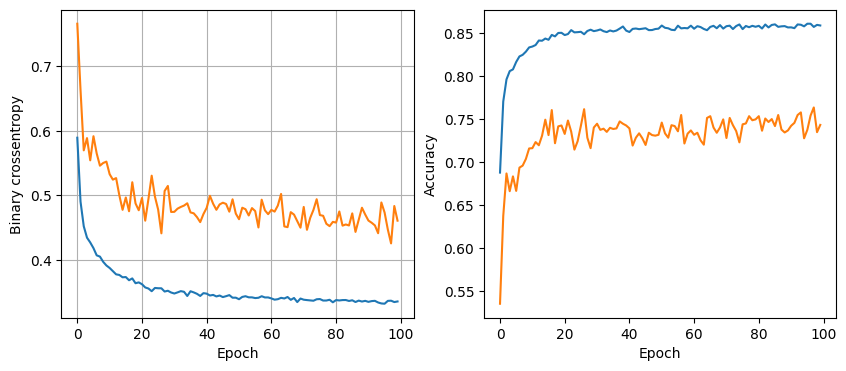

119/119 [==============================] - 0s 2ms/step - loss: 0.3282 - accuracy: 0.8615
16 nodes, dropout 0.2, lr 0.001, batch size 128


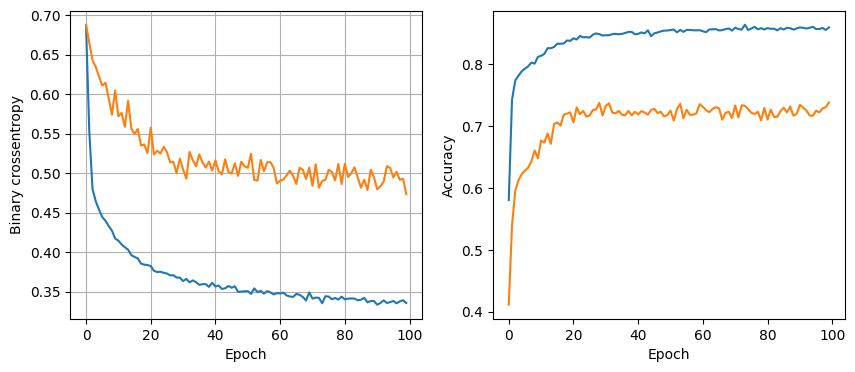

119/119 [==============================] - 0s 2ms/step - loss: 0.3224 - accuracy: 0.8638
32 nodes, dropout 0, lr 0.01, batch size 32


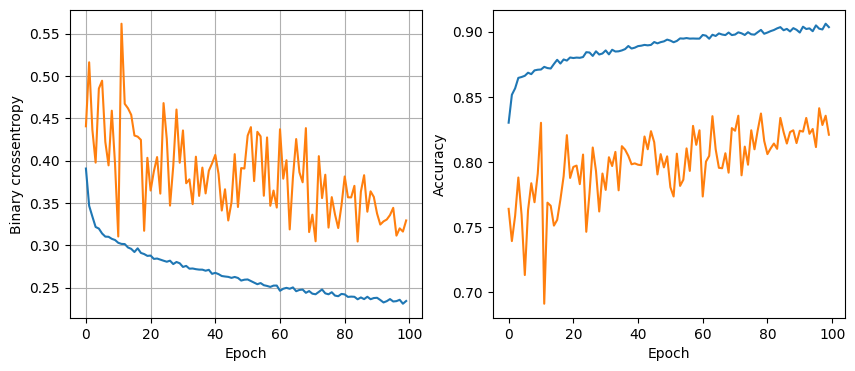

119/119 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8651
32 nodes, dropout 0, lr 0.01, batch size 64


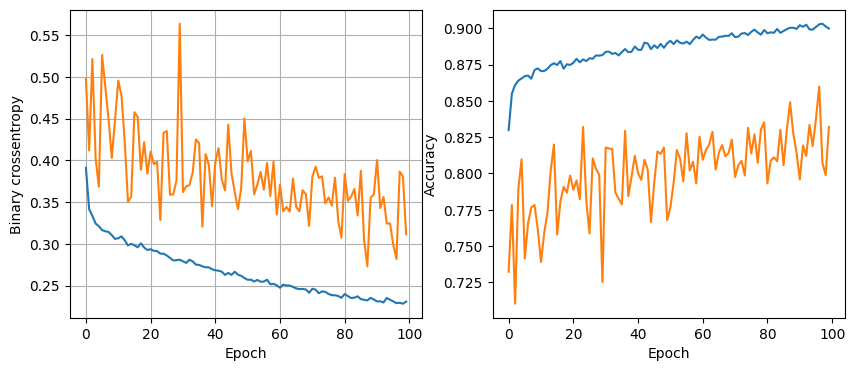

119/119 [==============================] - 0s 4ms/step - loss: 0.4324 - accuracy: 0.8544
32 nodes, dropout 0, lr 0.01, batch size 128


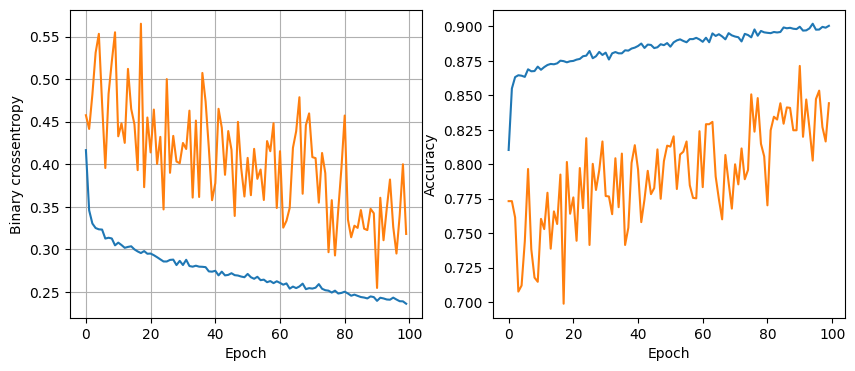

119/119 [==============================] - 0s 3ms/step - loss: 0.3996 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.005, batch size 32


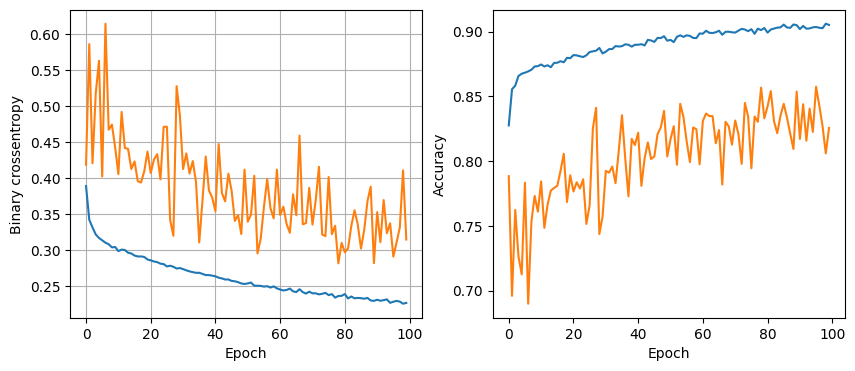

119/119 [==============================] - 0s 2ms/step - loss: 0.3795 - accuracy: 0.8717
32 nodes, dropout 0, lr 0.005, batch size 64


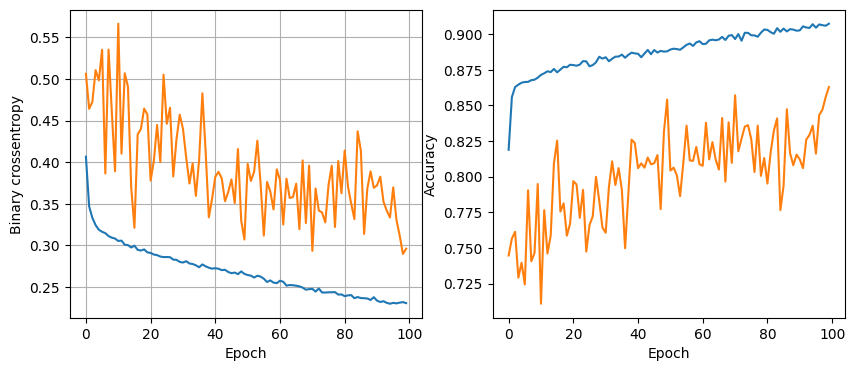

119/119 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8620
32 nodes, dropout 0, lr 0.005, batch size 128


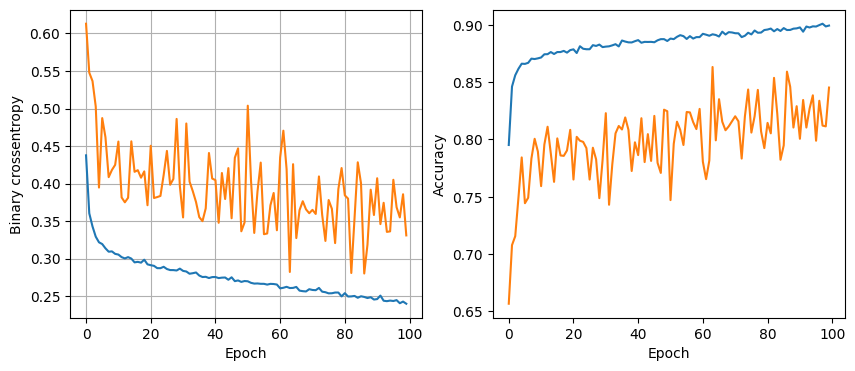

119/119 [==============================] - 0s 2ms/step - loss: 0.3493 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.001, batch size 32


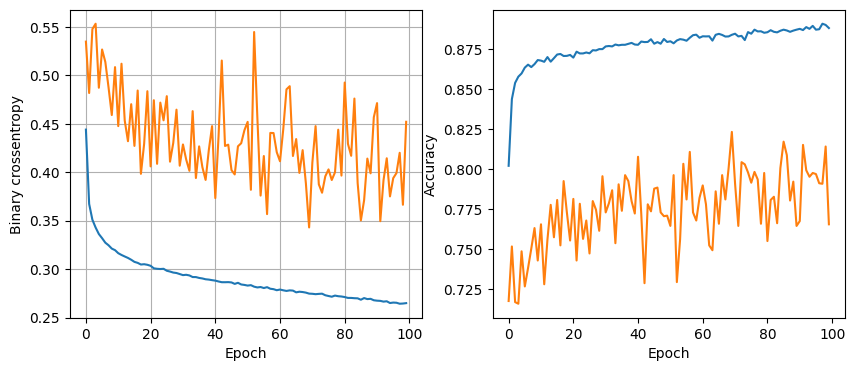

119/119 [==============================] - 0s 2ms/step - loss: 0.3367 - accuracy: 0.8630
32 nodes, dropout 0, lr 0.001, batch size 64


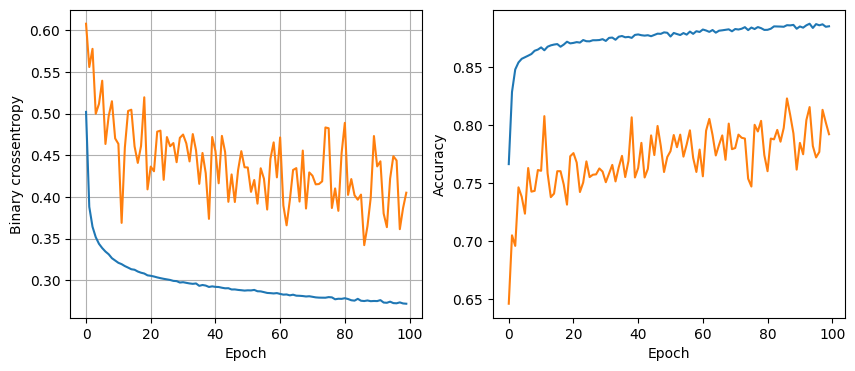

119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8612
32 nodes, dropout 0, lr 0.001, batch size 128


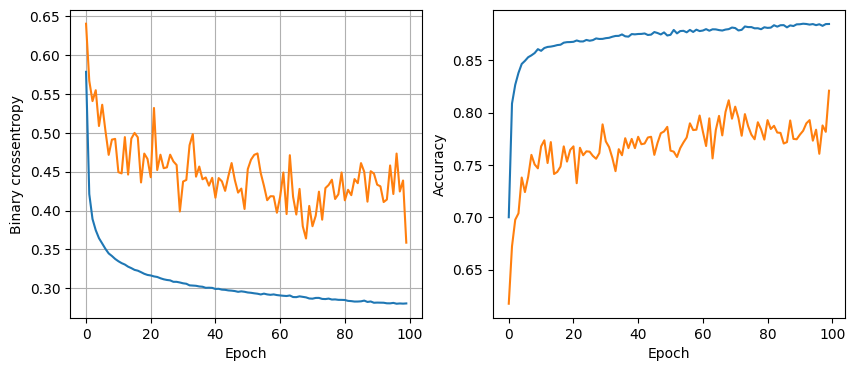

119/119 [==============================] - 0s 2ms/step - loss: 0.3311 - accuracy: 0.8615
32 nodes, dropout 0.2, lr 0.01, batch size 32


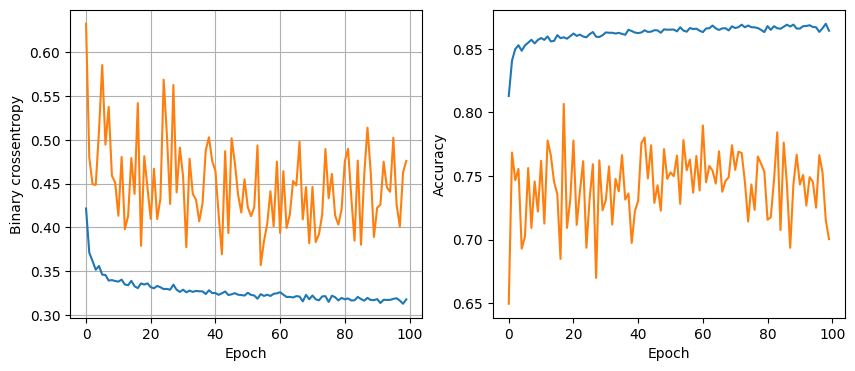

119/119 [==============================] - 0s 2ms/step - loss: 0.3280 - accuracy: 0.8665
32 nodes, dropout 0.2, lr 0.01, batch size 64


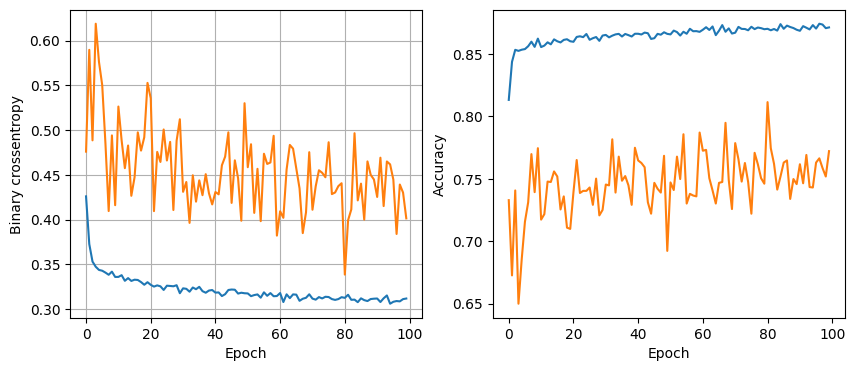

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8680
32 nodes, dropout 0.2, lr 0.01, batch size 128


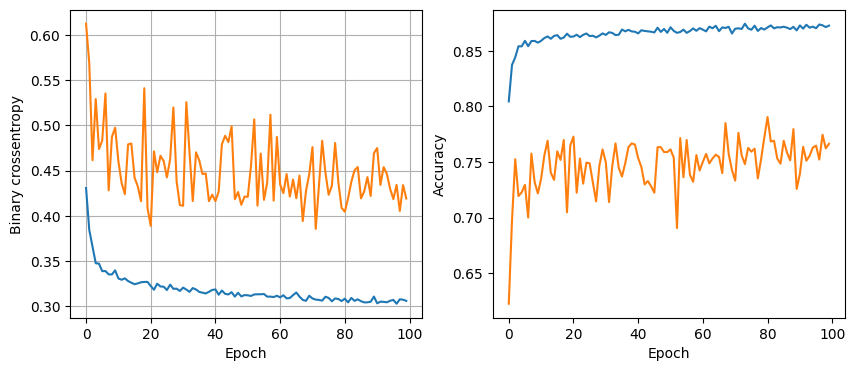

119/119 [==============================] - 0s 2ms/step - loss: 0.3157 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.005, batch size 32


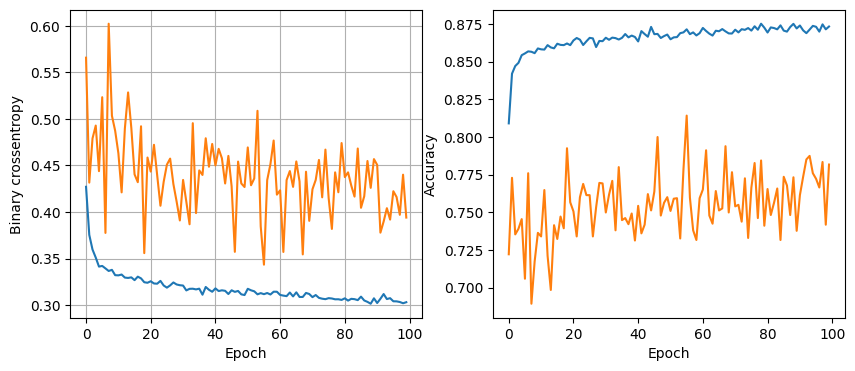

119/119 [==============================] - 0s 2ms/step - loss: 0.3133 - accuracy: 0.8728
32 nodes, dropout 0.2, lr 0.005, batch size 64


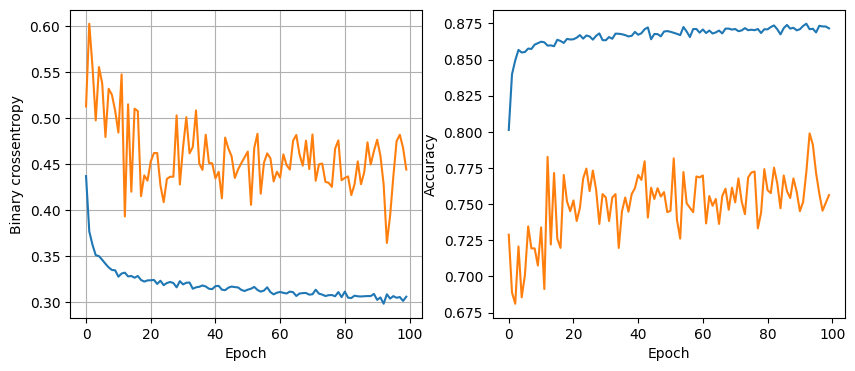

119/119 [==============================] - 0s 2ms/step - loss: 0.3109 - accuracy: 0.8691
32 nodes, dropout 0.2, lr 0.005, batch size 128


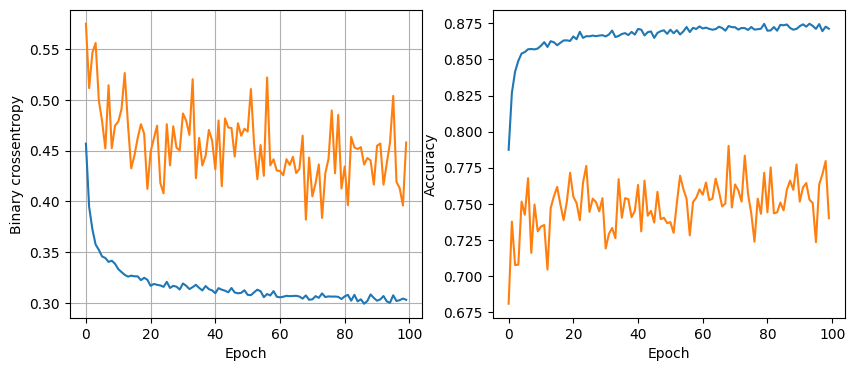

119/119 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8680
32 nodes, dropout 0.2, lr 0.001, batch size 32


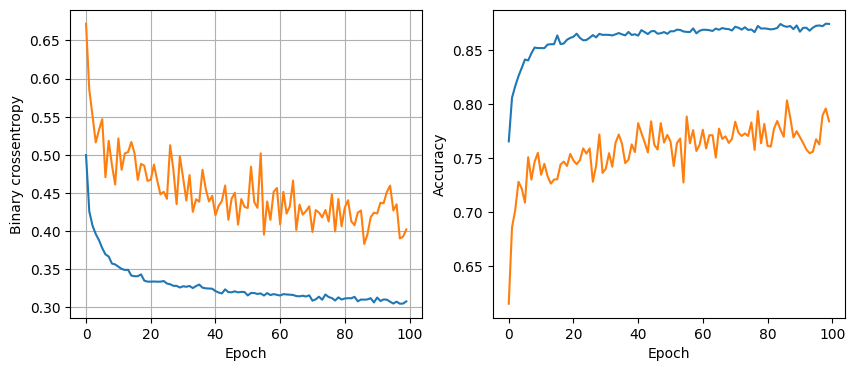

119/119 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.8659
32 nodes, dropout 0.2, lr 0.001, batch size 64


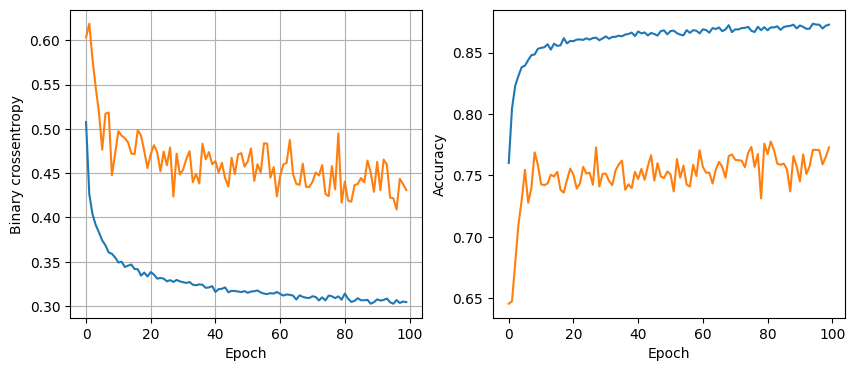

119/119 [==============================] - 0s 3ms/step - loss: 0.3170 - accuracy: 0.8667
32 nodes, dropout 0.2, lr 0.001, batch size 128


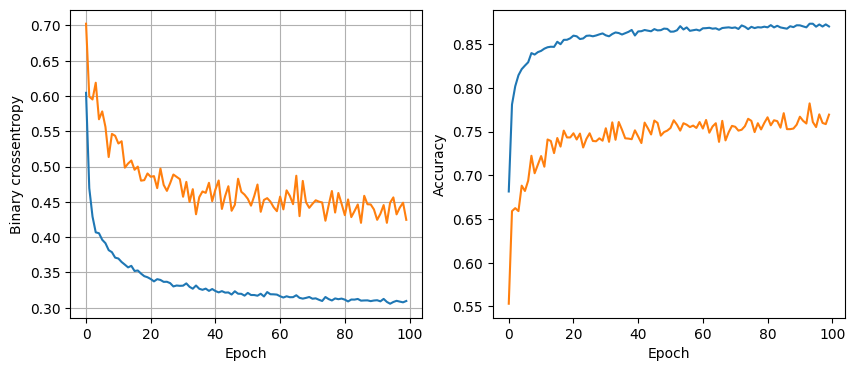

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8670
64 nodes, dropout 0, lr 0.01, batch size 32


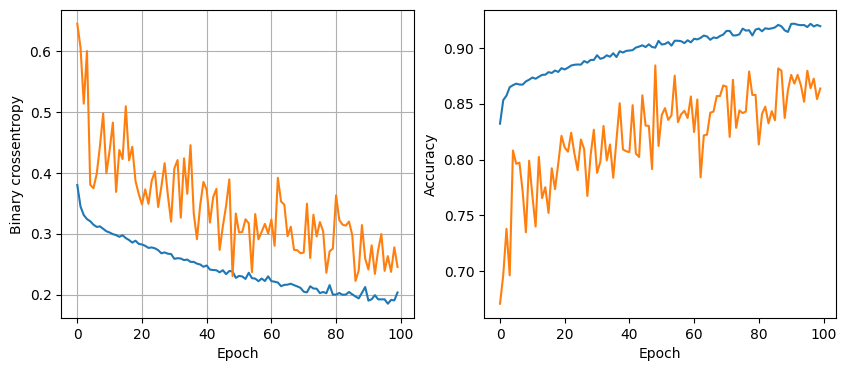

119/119 [==============================] - 0s 4ms/step - loss: 0.5297 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.01, batch size 64


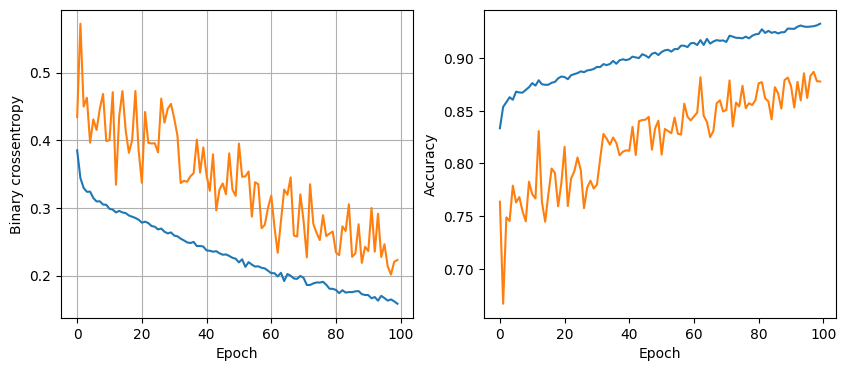

119/119 [==============================] - 0s 3ms/step - loss: 0.6328 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.01, batch size 128


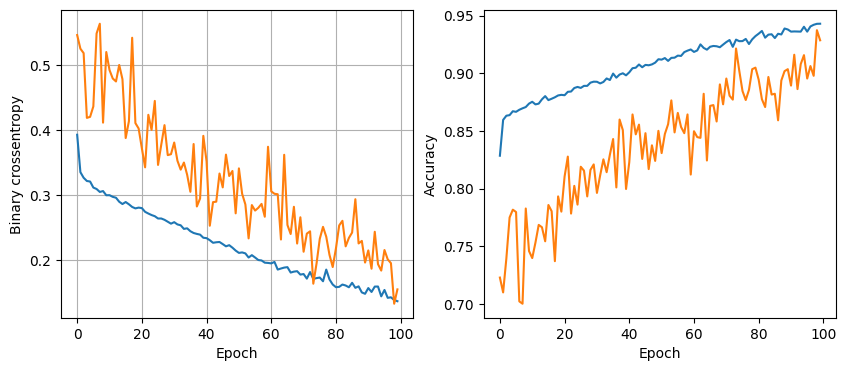

119/119 [==============================] - 0s 3ms/step - loss: 0.6122 - accuracy: 0.8573
64 nodes, dropout 0, lr 0.005, batch size 32


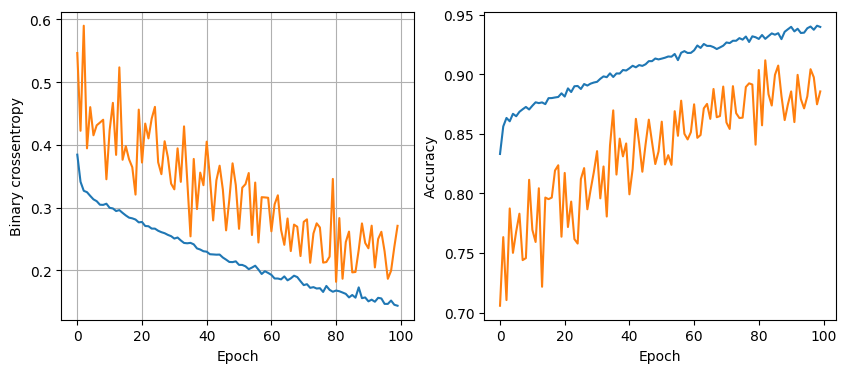

119/119 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.8557
64 nodes, dropout 0, lr 0.005, batch size 64


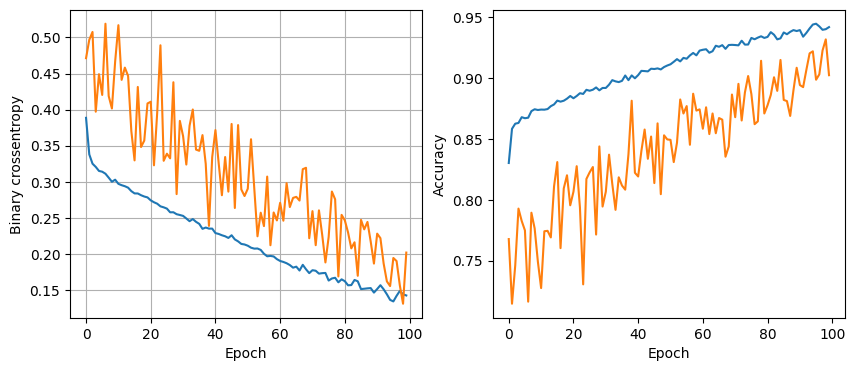

119/119 [==============================] - 0s 3ms/step - loss: 0.6386 - accuracy: 0.8544
64 nodes, dropout 0, lr 0.005, batch size 128


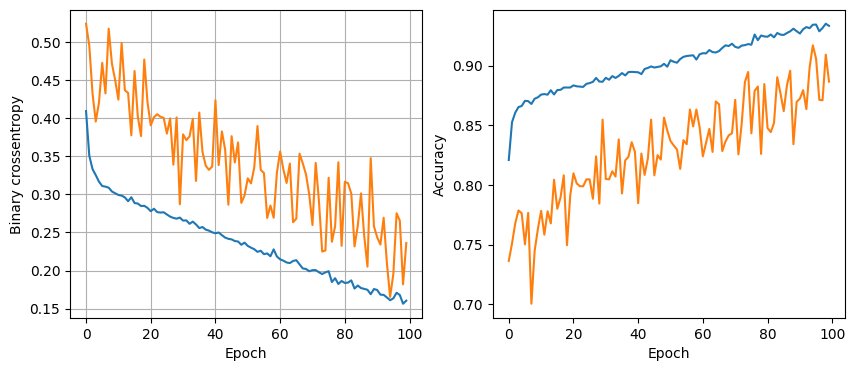

119/119 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.8678
64 nodes, dropout 0, lr 0.001, batch size 32


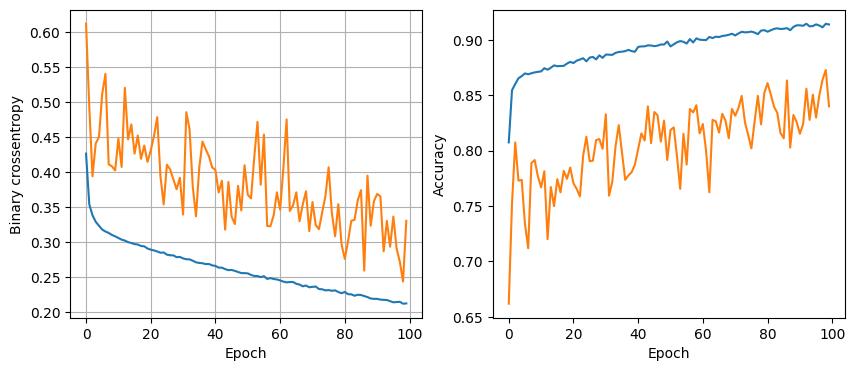

119/119 [==============================] - 0s 3ms/step - loss: 0.3612 - accuracy: 0.8680
64 nodes, dropout 0, lr 0.001, batch size 64


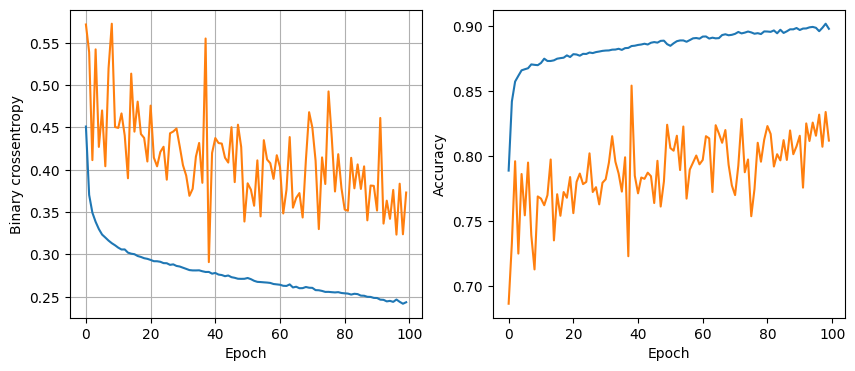

119/119 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8678
64 nodes, dropout 0, lr 0.001, batch size 128


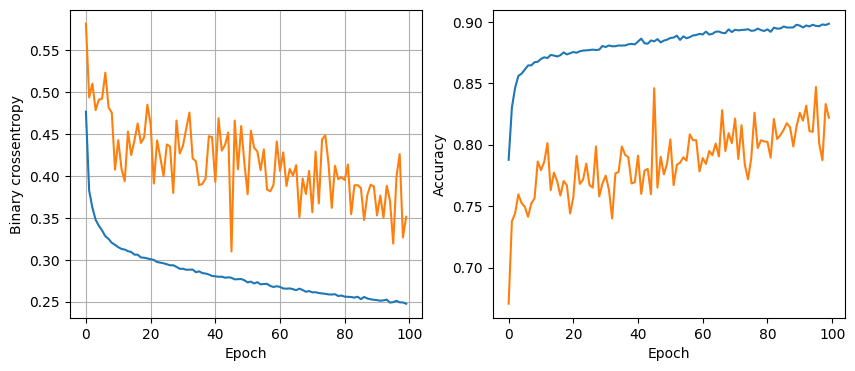

119/119 [==============================] - 0s 2ms/step - loss: 0.3300 - accuracy: 0.8670
64 nodes, dropout 0.2, lr 0.01, batch size 32


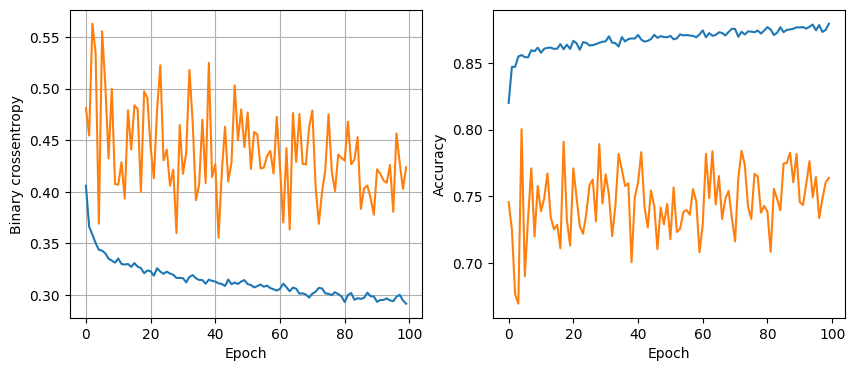

119/119 [==============================] - 0s 2ms/step - loss: 0.3354 - accuracy: 0.8680
64 nodes, dropout 0.2, lr 0.01, batch size 64


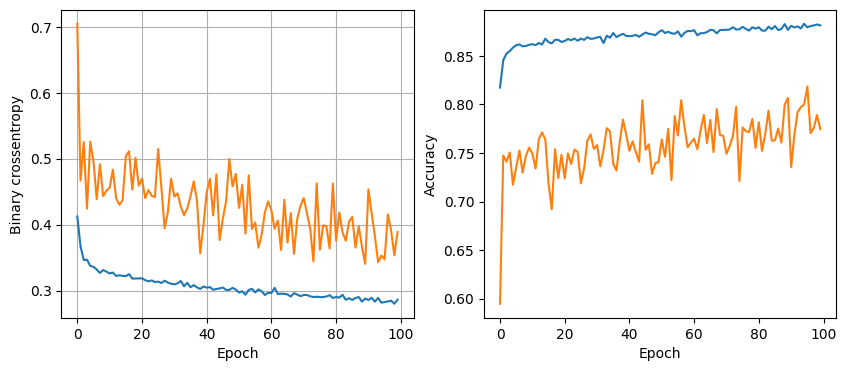

119/119 [==============================] - 0s 3ms/step - loss: 0.3163 - accuracy: 0.8707
64 nodes, dropout 0.2, lr 0.01, batch size 128


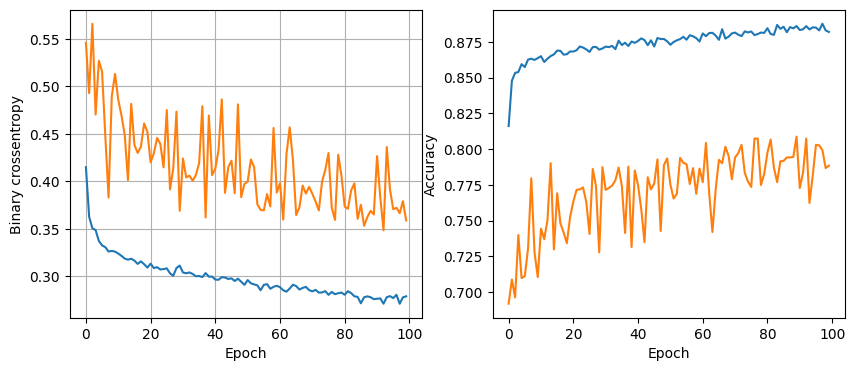

119/119 [==============================] - 0s 2ms/step - loss: 0.3194 - accuracy: 0.8720
64 nodes, dropout 0.2, lr 0.005, batch size 32


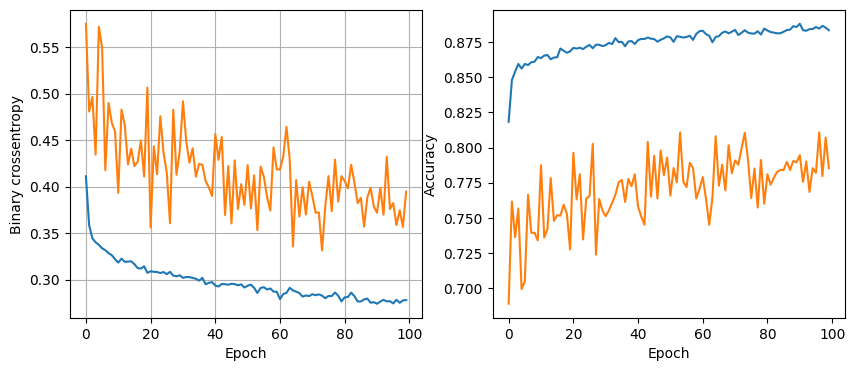

119/119 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8728
64 nodes, dropout 0.2, lr 0.005, batch size 64


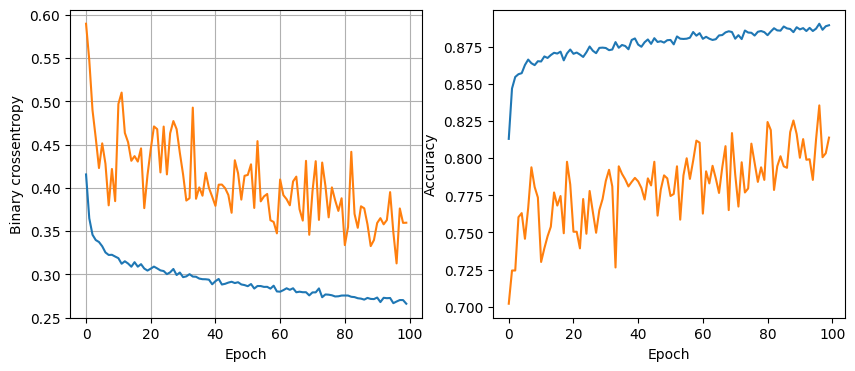

119/119 [==============================] - 0s 3ms/step - loss: 0.3182 - accuracy: 0.8736
64 nodes, dropout 0.2, lr 0.005, batch size 128


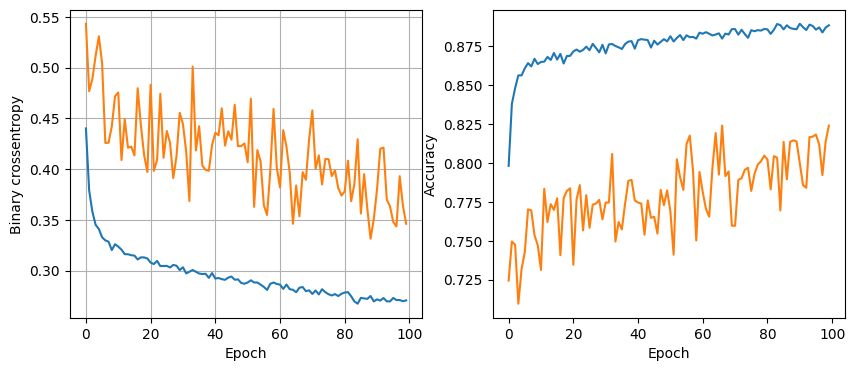

119/119 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.001, batch size 32


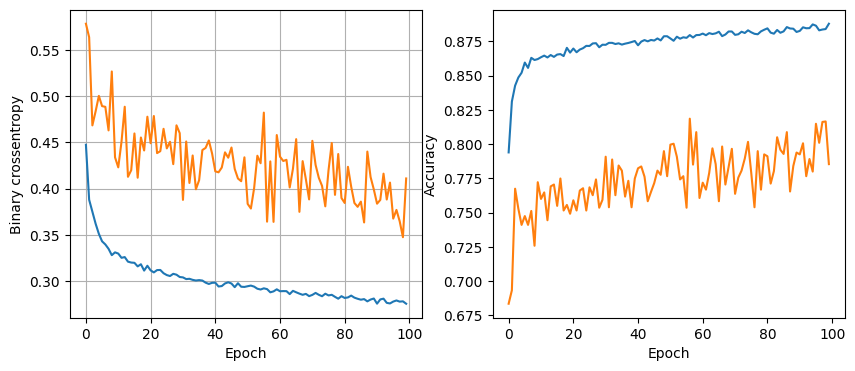

119/119 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.8686
64 nodes, dropout 0.2, lr 0.001, batch size 64


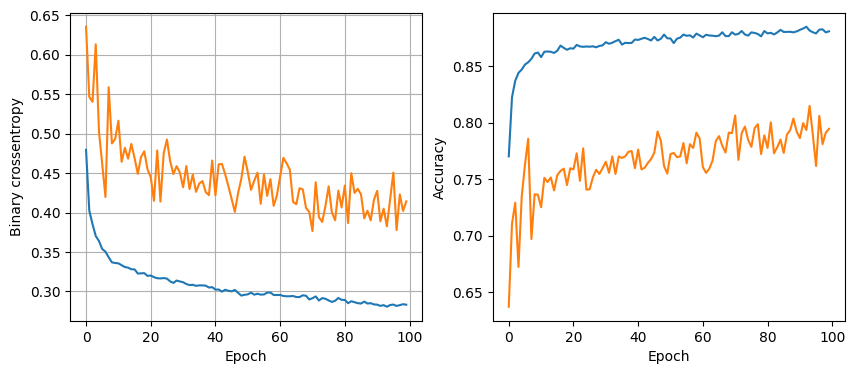

119/119 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8720
64 nodes, dropout 0.2, lr 0.001, batch size 128


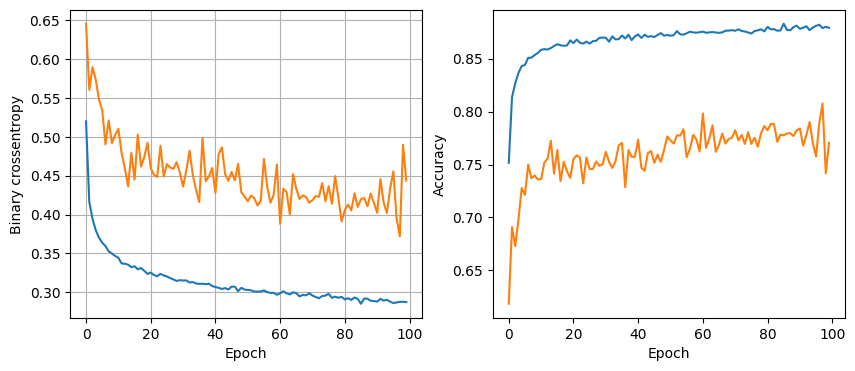

119/119 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8693


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f'{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}')
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(x_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)


119/119 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1333
           1       0.87      0.95      0.91      2471

    accuracy                           0.87      3804
   macro avg       0.88      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

